## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading 1st - Datasets from Ball_csv files

In [2]:
delivery_data = pd.read_csv('Assignmet _Data/IPL Ball-by-Ball 2008-2020.csv')
delivery_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [3]:
delivery_data.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [4]:
delivery_data.shape

(193468, 18)

In [5]:
delivery_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [6]:
delivery_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,193468.0,756768.808439,306097.091418,335982.0,501227.0,729297.0,1082628.0,1237181.0
inning,193468.0,1.482131,0.499682,1.0,1.0,1.0,2.0,2.0
over,193468.0,9.177027,5.676848,0.0,4.0,9.0,14.0,19.0
ball,193468.0,3.615967,1.807128,1.0,2.0,4.0,5.0,9.0
batsman_runs,193468.0,1.240231,1.610867,0.0,0.0,1.0,1.0,6.0
extra_runs,193468.0,0.066414,0.339991,0.0,0.0,0.0,0.0,7.0
total_runs,193468.0,1.306645,1.598802,0.0,0.0,1.0,1.0,7.0
non_boundary,193468.0,0.000083,0.009094,0.0,0.0,0.0,0.0,1.0
is_wicket,193468.0,0.049078,0.216031,0.0,0.0,0.0,0.0,1.0


# Data Prepairation

In [7]:
delivery_data.extras_type.unique()

array([nan, 'byes', 'wides', 'legbyes', 'noballs', 'penalty'],
      dtype=object)

In [8]:
delivery_data['extras_type'] = delivery_data['extras_type'].fillna('no extra')

In [9]:
# add new cloumns on deliver_data according to the extra_type details
delivery_data = pd.get_dummies(delivery_data , columns=['extras_type'])

In [10]:
delivery_data.rename(columns={'extras_type_byes': "byes" , 'extras_type_legbyes': 'legbyes', 'extras_type_noballs': 'noballs', 'extras_type_penalty':'penalty','extras_type_wides':'wides'}, inplace = True )

In [11]:
delivery_data = delivery_data.drop(columns=['extras_type_no extra'], errors='ignore')

In [12]:
delivery_data = delivery_data.replace({True: 1, False: 0})

In [13]:
# Team details with a  standrad name (same Teams with different type of name)

team_mapping = {
    "Rising Pune Supergiants": "Pune Warriors",
    "Rising Pune Supergiant": "Pune Warriors",
    "Delhi Capitals": "Delhi Daredevils",
    "Royal Challengers Bangalore": "RCB",
    "Kolkata Knight Riders": "KKR",
    "Deccan Chargers": "Sunrisers Hyderabad",
    "Chennai Super Kings": "CSK",
    "Kings XI Punjab": "Kings XI"
}

delivery_data['bowling_team'] = delivery_data['bowling_team'].replace(to_replace=team_mapping)
delivery_data['batting_team'] = delivery_data['batting_team'].replace(to_replace=team_mapping)

# Display unique values after standardization
print("Unique Bowling Teams:", delivery_data['bowling_team'].unique())
print("Unique Batting Teams:", delivery_data['batting_team'].unique())


Unique Bowling Teams: ['RCB' 'KKR' 'CSK' 'Kings XI' 'Delhi Daredevils' 'Rajasthan Royals'
 'Mumbai Indians' 'Sunrisers Hyderabad' 'Kochi Tuskers Kerala'
 'Pune Warriors' nan 'Gujarat Lions']
Unique Batting Teams: ['KKR' 'RCB' 'Kings XI' 'CSK' 'Rajasthan Royals' 'Delhi Daredevils'
 'Mumbai Indians' 'Sunrisers Hyderabad' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Gujarat Lions']


In [14]:
df_ball= delivery_data.sort_values(by=['id'])
df_ball

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,dismissal_kind,player_dismissed,fielder,batting_team,bowling_team,byes,legbyes,noballs,penalty,wides
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,...,NaN,NaN,NaN,KKR,RCB,0,0,0,0,0
143,335982,2,9,2,P Kumar,AA Noffke,SC Ganguly,0,0,0,...,NaN,NaN,NaN,RCB,KKR,0,0,0,0,0
144,335982,2,9,3,P Kumar,AA Noffke,SC Ganguly,0,0,0,...,NaN,NaN,NaN,RCB,KKR,0,0,0,0,0
145,335982,2,9,4,P Kumar,AA Noffke,SC Ganguly,0,1,1,...,NaN,NaN,NaN,RCB,KKR,0,0,0,0,1
146,335982,2,9,5,P Kumar,AA Noffke,SC Ganguly,0,1,1,...,NaN,NaN,NaN,RCB,KKR,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193315,1237181,2,8,3,RG Sharma,SA Yadav,P Dubey,6,0,6,...,NaN,NaN,NaN,Mumbai Indians,Delhi Daredevils,0,0,0,0,0
193316,1237181,2,8,4,RG Sharma,SA Yadav,P Dubey,0,0,0,...,NaN,NaN,NaN,Mumbai Indians,Delhi Daredevils,0,0,0,0,0
193317,1237181,2,8,5,RG Sharma,SA Yadav,P Dubey,6,0,6,...,NaN,NaN,NaN,Mumbai Indians,Delhi Daredevils,0,0,0,0,0
193305,1237181,2,6,5,RG Sharma,SA Yadav,P Dubey,0,0,0,...,NaN,NaN,NaN,Mumbai Indians,Delhi Daredevils,0,0,0,0,0


## Reading 2nd - Datasets from Match_csv files

In [15]:
match_data = pd.read_csv('Assignmet _Data/IPL Matches 2008-2020.csv')

In [16]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [17]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [18]:
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

# Data Prepairation

In [19]:
match_data.city.unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah'], dtype=object)

In [20]:
#replace the null rows of the city as per the venue details 
match_data.city.fillna(match_data.venue , inplace= True)

In [21]:
match_data.city = match_data.city.replace(to_replace='Dubai International Cricket Stadium' , value='Dubai')
match_data.city = match_data.city.replace(to_replace='Sharjah Cricket Stadium' , value='Sharjah')
match_data.city = match_data.city.replace(to_replace='Navi Mumbai', value='Mumbai')
match_data.city = match_data.city.replace(to_replace='Bangalore', value='Bengaluru')

In [22]:
match_data.city.unique()

array(['Bengaluru', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur'], dtype=object)

In [23]:
# rename the venue details with a  standrad name (same venues with different type of name)
match_data.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [24]:
# Mapping for venue name standardization
venue_mapping = {
    "M Chinnaswamy Stadium":"MC Stadiun",
    "Feroz Shah Kotla":"F.s.Kotla",
    "Punjab Cricket Association IS Bindra Stadium, Mohali": "PCAB Stadium",
    "Sawai Mansingh Stadium":"S.Mansing Stadium",
    "Rajiv Gandhi International Stadium": "RG.Int. Stadium",
    "Rajiv Gandhi International Stadium, Uppal": "RG.Int. Stadium",
    "MA Chidambaram Stadium, Chepauk": "MA Chidambaram Stadium",
    "Dr DY Patil Sports Academy": "P,Sports Academy",
    'De Beers Diamond Oval': "DBD_Oval",
    'New Wanderers Stadium' :"NW Stadium",
    "Sardar Patel Stadium, Motera": "Sardar Patel Stadium",
    "Vidarbha Cricket Association Stadium, Jamtha": "VCA Stadium",
    "Himachal Pradesh Cricket Association Stadium": "HPCA Stadium",
    "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium": "Dr.YSRR Stadium",
    "Subrata Roy Sahara Stadium": "SRS Stadium",
    "Shaheed Veer Narayan Singh International Stadium": "SVNS.Int. Stadium",
    "JSCA International Stadium Complex": "JSCA.Int. Stadium",
    "Dubai International Cricket Stadium": "Dubai.Int.Stadium",
    "Maharashtra Cricket Association Stadium": "MCA Stadium",
    "Punjab Cricket Association Stadium, Mohali": "PCAB Stadium",
    "Saurashtra Cricket Association Stadium": "SCA Stadium",
    "M.Chinnaswamy Stadium":"MC Stadiun",

}

# Apply venue name standardization to 'Venue' column
match_data['venue'] = match_data['venue'].replace(to_replace=venue_mapping)

# Display unique values after standardization
print(match_data['venue'].unique())


['MC Stadiun' 'PCAB Stadium' 'F.s.Kotla' 'Wankhede Stadium' 'Eden Gardens'
 'S.Mansing Stadium' 'RG.Int. Stadium' 'MA Chidambaram Stadium'
 'P,Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo Park' 'NW Stadium' 'DBD_Oval'
 'OUTsurance Oval' 'Brabourne Stadium' 'Sardar Patel Stadium'
 'Barabati Stadium' 'VCA Stadium' 'HPCA Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium' 'Dr.YSRR Stadium' 'SRS Stadium'
 'SVNS.Int. Stadium' 'JSCA.Int. Stadium' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai.Int.Stadium' 'MCA Stadium' 'SCA Stadium'
 'Green Park']


In [25]:
# Team details with a standard name (same teams with different types of names)
team_mapping1 = {
    "Rising Pune Supergiants": "Pune Warriors",
    "Rising Pune Supergiant": "Pune Warriors",
    "Delhi Capitals": "Delhi Daredevils",
    "Royal Challengers Bangalore": "RCB",
    "Kolkata Knight Riders": "KKR",
    "Deccan Chargers": "Sunrisers Hyderabad",
    "Chennai Super Kings": "CSK",
    "Kings XI Punjab": "Kings XI"
}

# Columns to standardize
columns_to_standardize = ['team1', 'team2', 'toss_winner', 'winner']

# Apply team name standardization to specified columns
for column in columns_to_standardize:
    match_data[column] = match_data[column].replace(to_replace=team_mapping1)

# Display unique values after standardization
for column in columns_to_standardize:
    print(f"Unique {column}:", match_data[column].unique())

Unique team1: ['RCB' 'Kings XI' 'Delhi Daredevils' 'Mumbai Indians' 'KKR'
 'Rajasthan Royals' 'Sunrisers Hyderabad' 'CSK' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Gujarat Lions']
Unique team2: ['KKR' 'CSK' 'Rajasthan Royals' 'RCB' 'Sunrisers Hyderabad' 'Kings XI'
 'Delhi Daredevils' 'Mumbai Indians' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Gujarat Lions']
Unique toss_winner: ['RCB' 'CSK' 'Rajasthan Royals' 'Mumbai Indians' 'Sunrisers Hyderabad'
 'Kings XI' 'KKR' 'Delhi Daredevils' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Gujarat Lions']
Unique winner: ['KKR' 'CSK' 'Delhi Daredevils' 'RCB' 'Rajasthan Royals' 'Kings XI'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Pune Warriors'
 'Kochi Tuskers Kerala' nan 'Gujarat Lions']


In [26]:
df_match= match_data.sort_values(by=['id'])

In [27]:
df_match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bengaluru,2008-04-18,BB McCullum,MC Stadiun,0,RCB,KKR,RCB,field,KKR,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,PCAB Stadium,0,Kings XI,CSK,CSK,bat,CSK,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,F.s.Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,RCB,Mumbai Indians,bat,RCB,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,KKR,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,KKR,wickets,5.0,N,NaN,BF Bowden,K Hariharan


# Merge the two data frame and create a single data frame

In [28]:
df_merge = df_match.merge(df_ball, on= ['id'])
df_merge.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,dismissal_kind,player_dismissed,fielder,batting_team,bowling_team,byes,legbyes,noballs,penalty,wides
0,335982,Bengaluru,2008-04-18,BB McCullum,MC Stadiun,0,RCB,KKR,RCB,field,...,NaN,NaN,NaN,KKR,RCB,0,0,0,0,0
1,335982,Bengaluru,2008-04-18,BB McCullum,MC Stadiun,0,RCB,KKR,RCB,field,...,NaN,NaN,NaN,RCB,KKR,0,0,0,0,0
2,335982,Bengaluru,2008-04-18,BB McCullum,MC Stadiun,0,RCB,KKR,RCB,field,...,NaN,NaN,NaN,RCB,KKR,0,0,0,0,0
3,335982,Bengaluru,2008-04-18,BB McCullum,MC Stadiun,0,RCB,KKR,RCB,field,...,NaN,NaN,NaN,RCB,KKR,0,0,0,0,1
4,335982,Bengaluru,2008-04-18,BB McCullum,MC Stadiun,0,RCB,KKR,RCB,field,...,NaN,NaN,NaN,RCB,KKR,0,1,0,0,0


In [29]:
df_merge.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'inning',
       'over', 'ball', 'batsman', 'non_striker', 'bowler', 'batsman_runs',
       'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'batting_team',
       'bowling_team', 'byes', 'legbyes', 'noballs', 'penalty', 'wides'],
      dtype='object')

In [30]:
# add new column of ball_data set fro partnership analysis
df_merge['1st_batter'] = df_merge.apply(lambda x: x['batsman'] if x['batsman'] < x['non_striker'] else x['non_striker'], axis=1)
df_merge['2nd_batter'] = df_merge.apply(lambda x: x['non_striker'] if x['batsman'] < x['non_striker'] else x['batsman'] , axis=1)

In [31]:
df_merge['bowling_team'] = df_merge.apply(lambda x: x['team2'] if x['batting_team'] == x['team1'] else x['team1'], axis=1)

In [32]:
df_merge.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'inning',
       'over', 'ball', 'batsman', 'non_striker', 'bowler', 'batsman_runs',
       'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'batting_team',
       'bowling_team', 'byes', 'legbyes', 'noballs', 'penalty', 'wides',
       '1st_batter', '2nd_batter'],
      dtype='object')

In [33]:
df_merge.isnull().sum()

id                       0
city                     0
date                     0
player_of_match        372
venue                    0
neutral_venue            0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                 372
result                 372
result_margin         3597
eliminator             372
method              190260
umpire1                  0
umpire2                  0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
batting_team             0
bowling_team             0
byes                     0
legbyes                  0
noballs                  0
penalty                  0
w

In [34]:
# Assuming 'date' is the column containing dates in your DataFrame
# Replace this with the actual column name in your DataFrame
df_merge['date'] = pd.to_datetime(df_merge['date'])

# Extract years and create a new 'year' column
df_merge['Season'] = df_merge['date'].dt.year
df_merge.Season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020], dtype=int32)

## Exploratory Data Analysis

# 1. What was the count of matches played in each season? 

In [35]:
Season_data = df_merge.groupby(['id','Season']).count().index.droplevel(level=0).value_counts().sort_index()
Season_data

Season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
Name: count, dtype: int64

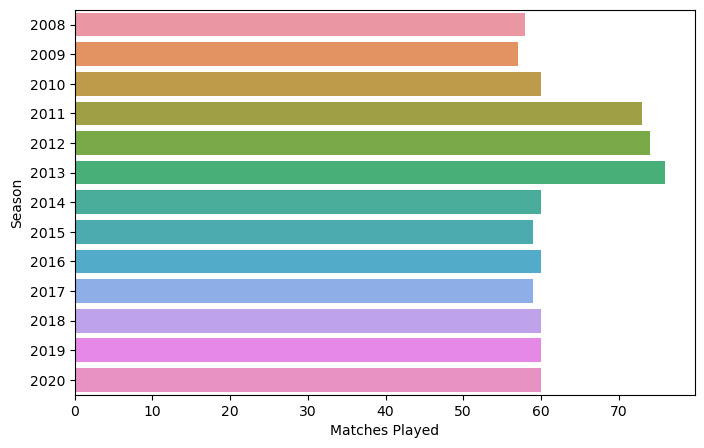

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(y=Season_data.index,x=Season_data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Season')
plt.show()

# 2.How many runs were scored in each season?

In [37]:
print('Runs were scored in each season')
Season_run = df_merge.groupby(['Season'])['total_runs'].sum().sort_values(ascending=False)
Season_run

Runs were scored in each season


Season
2013    22541
2012    22453
2011    21154
2018    19901
2019    19400
2020    19352
2014    18909
2010    18864
2016    18862
2017    18769
2015    18332
2008    17937
2009    16320
Name: total_runs, dtype: int64

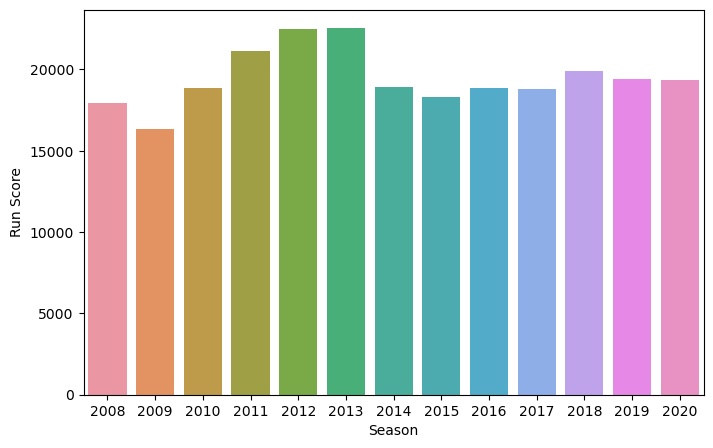

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(y=Season_run,x=Season_run.index,orient='v')
plt.xlabel('Season')
plt.ylabel('Run Score')
plt.show()

# 3. What were the runs scored per match in different seasons?

In [39]:
# Group by season and sum the total runs
runs_per_season = df_merge.groupby('Season')['total_runs'].sum().reset_index()

# Display the result
print(runs_per_season)


    Season  total_runs
0     2008       17937
1     2009       16320
2     2010       18864
3     2011       21154
4     2012       22453
5     2013       22541
6     2014       18909
7     2015       18332
8     2016       18862
9     2017       18769
10    2018       19901
11    2019       19400
12    2020       19352


# 4. Who has umpired the most?

In [40]:
# Concatenate 'umpire1' and 'umpire2' columns to get all umpires
all_umpires = pd.concat([df_merge['umpire1'], df_merge['umpire2']], ignore_index=True)

# Count occurrences of each umpire
umpire_counts = all_umpires.value_counts().reset_index()

# Rename the columns for clarity
umpire_counts.columns = ['Umpire', 'Matches']

# Display the umpire who has umpired the most matches
most_umpired = umpire_counts.iloc[0]
print(f"The umpire who has umpired the most matches is {most_umpired['Umpire']} with {most_umpired['Matches']} matches.")

The umpire who has umpired the most matches is S Ravi with 29155 matches.


In [41]:
# Print the top 20 umpires who have umpired the most matches
print(f"Top 20 umpires who have umpired the most matches:\n{umpire_counts.head(20)}")

Top 20 umpires who have umpired the most matches:
                   Umpire  Matches
0                  S Ravi    29155
1         HDPK Dharmasena    22319
2            AK Chaudhary    20757
3           C Shamshuddin    19237
4               M Erasmus    15684
5             Nitin Menon    13512
6               CK Nandan    13419
7              SJA Taufel    13231
8               Asad Rauf    12010
9             VA Kulkarni    11959
10           BNJ Oxenford    11334
11            CB Gaffaney    11324
12              RJ Tucker    10738
13            BR Doctrove     9885
14            RE Koertzen     9625
15              Aleem Dar     9125
16              BF Bowden     8969
17               NJ Llong     8653
18  KN Ananthapadmanabhan     7881
19         RK Illingworth     7465


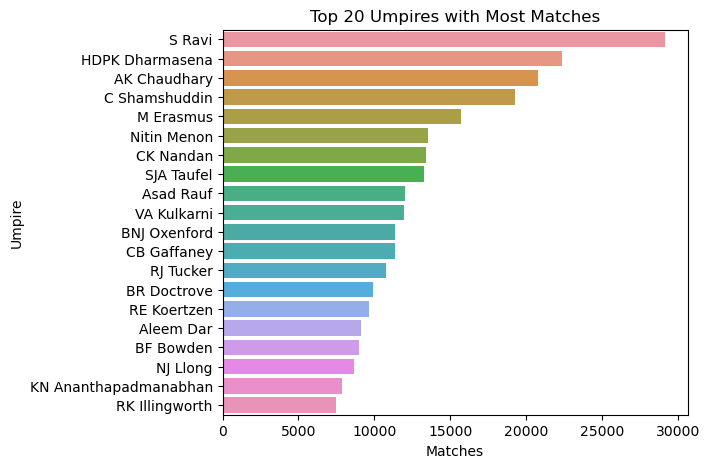

In [42]:
# Convert 'Matches' column to numeric
umpire_counts['Matches'] = pd.to_numeric(umpire_counts['Matches'])

# Plotting the top 20 umpires who have umpired the most matches
plt.figure(figsize=(6, 5))
sns.barplot(y=umpire_counts.head(20)['Umpire'], x=umpire_counts.head(20)['Matches'], orient='h')
plt.xlabel('Matches')
plt.ylabel('Umpire')
plt.title('Top 20 Umpires with Most Matches')
plt.show()

# 5. Which team has won the most tosses?

In [43]:
# Count occurrences of toss winners
toss_winner_counts = df_merge['toss_winner'].value_counts().reset_index()

# Rename the columns for clarity
toss_winner_counts.columns = ['Team', 'Toss Wins']

# Display the team that has won the most tosses
most_toss_wins = toss_winner_counts.iloc[0]
print(f"The team that has won the most tosses is {most_toss_wins['Team']} with {most_toss_wins['Toss Wins']} toss wins.")


The team that has won the most tosses is Mumbai Indians with 25404 toss wins.


In [44]:
# Print the top 10 teams who have  won the most tosses
print(f"Top 10 teams won the most tosses on most matches:\n{toss_winner_counts.head(20)}")

Top 10 teams won the most tosses on most matches:
                    Team  Toss Wins
0         Mumbai Indians      25404
1    Sunrisers Hyderabad      23807
2       Delhi Daredevils      23429
3                    CSK      23260
4                    KKR      23166
5       Rajasthan Royals      20634
6                    RCB      20454
7               Kings XI      20309
8          Pune Warriors       7672
9          Gujarat Lions       3573
10  Kochi Tuskers Kerala       1760


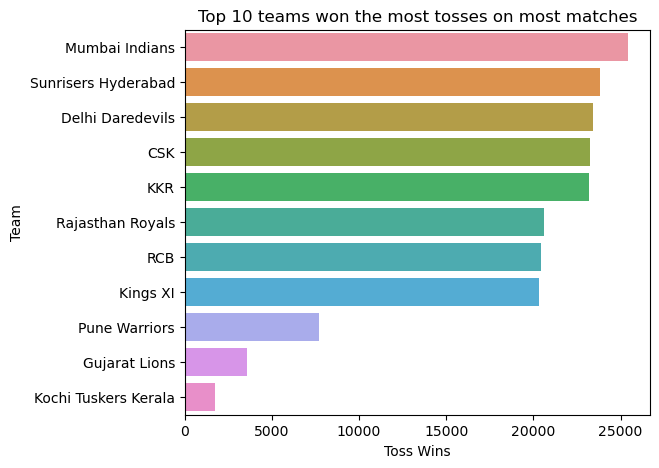

In [45]:
# Plotting the top 10 umpires who have umpired the most matches
plt.figure(figsize=(6, 5))
sns.barplot(y=toss_winner_counts.head(20)['Team'], x=toss_winner_counts.head(20)['Toss Wins'], orient='h')
plt.xlabel('Toss Wins')
plt.ylabel('Team')
plt.title('Top 10 teams won the most tosses on most matches')
plt.show()

# 6. What does the team decide after winning the toss?

In [46]:
# Count occurrences of toss decisions
toss_decision_counts = df_merge['toss_decision'].value_counts().reset_index()

# Rename the columns for clarity
toss_decision_counts.columns = ['Decision', 'Count']

# Display the toss decisions made by teams
print("Toss decisions made by teams:")
print(toss_decision_counts)

Toss decisions made by teams:
  Decision   Count
0    field  117127
1      bat   76341


In [47]:
# Filter the DataFrame based on the toss decision being 'field'
field_decisions = df_merge[df_merge['toss_decision'] == 'field']

# Count occurrences of field decisions by teams
field_decision_counts = field_decisions['toss_winner'].value_counts().reset_index()
field_decision_counts.columns = ['Team', 'Field Decisions']

# Filter the DataFrame based on the toss decision being 'bat'
bat_decisions = df_merge[df_merge['toss_decision'] == 'bat']

# Count occurrences of bat decisions by teams
bat_decision_counts = bat_decisions['toss_winner'].value_counts().reset_index()
bat_decision_counts.columns = ['Team', 'Bat Decisions']

# Display the teams that choose field and bat the most
print("Teams that choose to field the most:")
print(field_decision_counts.head(10))

print("\nTeams that choose to bat the most:")
print(bat_decision_counts.head(10))


Teams that choose to field the most:
                  Team  Field Decisions
0                  KKR            15094
1     Delhi Daredevils            15029
2                  RCB            14621
3             Kings XI            13859
4       Mumbai Indians            13801
5     Rajasthan Royals            12414
6  Sunrisers Hyderabad            12393
7                  CSK            11064
8        Pune Warriors             4471
9        Gujarat Lions             3323

Teams that choose to bat the most:
                   Team  Bat Decisions
0                   CSK          12196
1        Mumbai Indians          11603
2   Sunrisers Hyderabad          11414
3      Delhi Daredevils           8400
4      Rajasthan Royals           8220
5                   KKR           8072
6              Kings XI           6450
7                   RCB           5833
8         Pune Warriors           3201
9  Kochi Tuskers Kerala            702


# 7. Does winning the toss imply winning the game? 

In [48]:
# Count occurrences of match wins for teams choosing to field first
field_wins = df_merge[df_merge['toss_decision'] == 'field']['winner'].value_counts().reset_index()
field_wins.columns = ['Team', 'Field Wins']

# Count occurrences of match wins for teams choosing to bat first
bat_wins = df_merge[df_merge['toss_decision'] == 'bat']['winner'].value_counts().reset_index()
bat_wins.columns = ['Team', 'Bat Wins']

# Display the teams with the most wins after choosing to field and bat first
print("Teams with the most wins after choosing to field first:")
print(field_wins.head(10))

print("\nTeams with the most wins after choosing to bat first:")
print(bat_wins.head(10))


Teams with the most wins after choosing to field first:
                  Team  Field Wins
0       Mumbai Indians       16750
1             Kings XI       15265
2                  KKR       14305
3                  RCB       13954
4  Sunrisers Hyderabad       13759
5                  CSK       12388
6     Delhi Daredevils       12253
7     Rajasthan Royals       10475
8        Pune Warriors        3763
9        Gujarat Lions        2584

Teams with the most wins after choosing to bat first:
                  Team  Bat Wins
0                  CSK     13143
1       Mumbai Indians     12135
2                  KKR      9053
3  Sunrisers Hyderabad      8921
4     Rajasthan Royals      8895
5     Delhi Daredevils      8119
6                  RCB      7286
7             Kings XI      5639
8        Pune Warriors      2608
9        Gujarat Lions       479


# 8. How does the toss decision vary across seasons?

/home/debasish/anaconda3/envs/new_env39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/debasish/anaconda3/envs/new_env39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/debasish/anaconda3/envs/new_env39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/debasish/anaconda3/envs/new_env39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

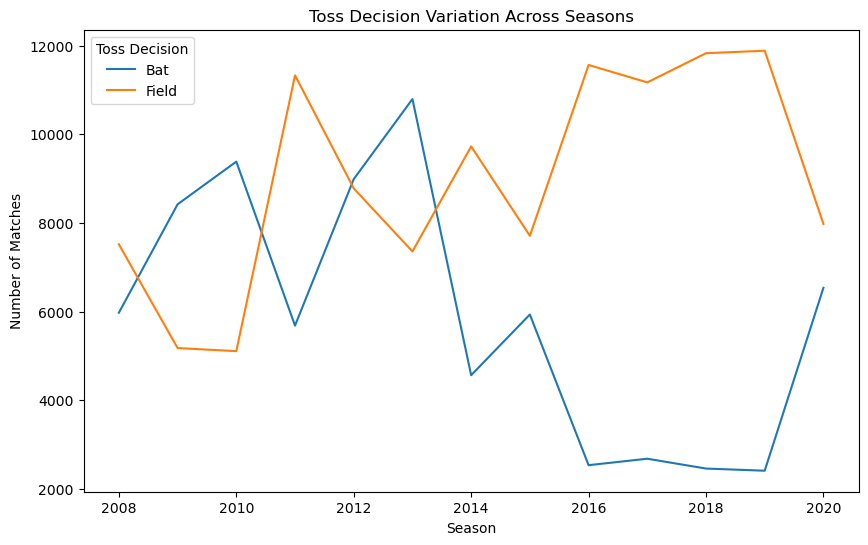

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## This code creates a line plot showing how the number of matches with different toss decisions ('bat' and 'field') 
## varies across seasons. It uses the seaborn library for visualization
# Count occurrences of toss decisions by season
toss_decision_by_season = df_merge.groupby(['Season', 'toss_decision']).size().unstack().reset_index()

# Plotting the variation of toss decisions across seasons
plt.figure(figsize=(10, 6))
sns.lineplot(x='Season', y='bat', data=toss_decision_by_season, label='Bat')
sns.lineplot(x='Season', y='field', data=toss_decision_by_season, label='Field')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.title('Toss Decision Variation Across Seasons')
plt.legend(title='Toss Decision')
plt.show()


# 9. How many times has the chasing team won the match?

In [50]:
# Filter DataFrame for matches where the chasing team won
chasing_team_wins = df_merge[df_merge['team2'] == df_merge['winner']]
defending_team_wins = df_merge[df_merge['team1'] == df_merge['winner']]

# Count the occurrences
num_chasing_wins = chasing_team_wins.shape[0]
num_defending_wins = defending_team_wins.shape[0]

print(f"The chasing team has won the match {num_chasing_wins} times.")
print(f"The defending team has won the match {num_defending_wins} times.")


The chasing team has won the match 87490 times.
The defending team has won the match 105606 times.


In [51]:
# Drop rows with NaN values in the 'result' column
df_merge = df_merge.dropna(subset=['result'])

# Verify unique values after removing NaN
result_values = df_merge['result'].unique()
print(result_values)

['runs' 'wickets' 'tie']


In [52]:
print('Top 10 chasing Team')
df_TossDecision1=df_merge[df_merge['toss_decision']=='field']
df_TossDecision1.groupby(['winner','id']).count().index.droplevel(level=1).value_counts().head(10)

Top 10 chasing Team


winner
Mumbai Indians         70
Kings XI               64
KKR                    61
RCB                    60
Sunrisers Hyderabad    58
Delhi Daredevils       52
CSK                    51
Rajasthan Royals       44
Pune Warriors          16
Gujarat Lions          11
Name: count, dtype: int64

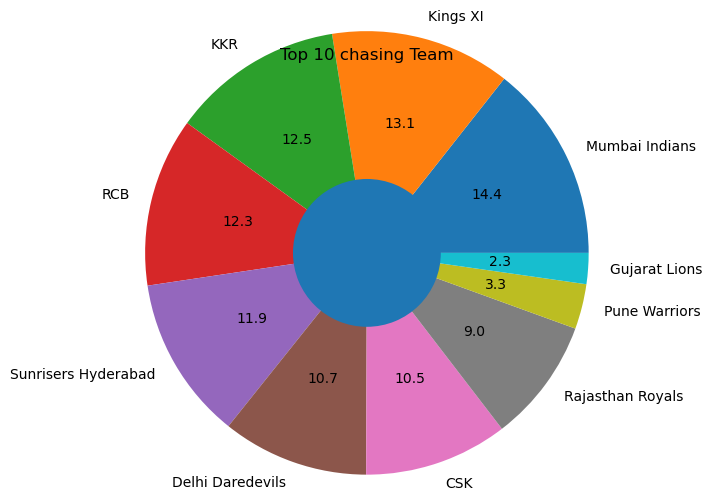

In [53]:
plt.pie(list(df_TossDecision1.groupby(['winner','id']).count().index.droplevel(level=1).value_counts().head(10)),labels=list(df_TossDecision1.groupby(['winner','id']).count().index.droplevel(level=1).value_counts().head(10).keys()),autopct="%0.1f",radius=1.5)
plt.pie([1],radius=0.5)
plt.title('Top 10 chasing Team')
plt.show()

In [54]:
print('Top 5 defending Team')
df_TossDecision=df_merge[df_merge['toss_decision']=='bat']
df_TossDecision.groupby(['winner','id']).count().index.droplevel(level=1).value_counts().head(5)

Top 5 defending Team


winner
CSK                    55
Mumbai Indians         50
KKR                    38
Rajasthan Royals       37
Sunrisers Hyderabad    37
Name: count, dtype: int64

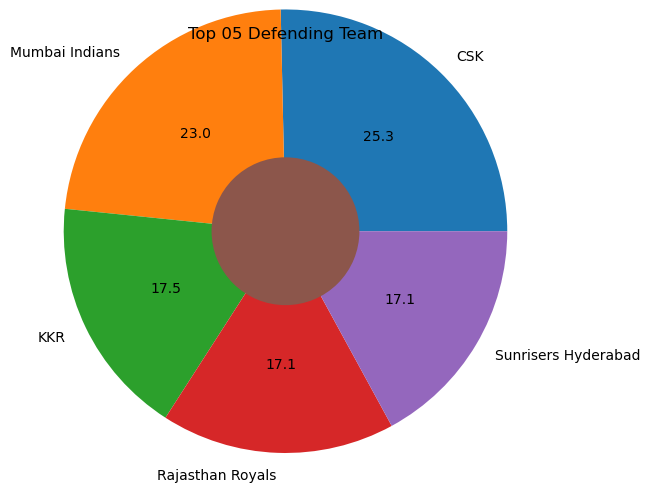

In [55]:
plt.pie(list(df_TossDecision.groupby(['winner','id']).count().index.droplevel(level=1).value_counts().head(5)),labels=list(df_TossDecision.groupby(['winner','id']).count().index.droplevel(level=1).value_counts().head(5).keys()),autopct="%0.1f",radius=1.5)
plt.pie([1],radius=0.5)
plt.title('Top 05 Defending Team')
plt.show()

# 10. Which all teams had won this tournament?

In [56]:
# Extract unique values from the 'winner' column
winning_teams = df_merge['winner'].unique()

# Display the teams that have won the tournament
print("Teams that have won the tournament:")
print(winning_teams)


Teams that have won the tournament:
['KKR' 'CSK' 'Delhi Daredevils' 'RCB' 'Rajasthan Royals' 'Kings XI'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Gujarat Lions']


In [57]:
# Extract unique values from the 'season' column
seasons = df_merge['Season'].unique()

# Create an empty DataFrame to store season winners
season_winners_df = pd.DataFrame(columns=['Season', 'Winner'])

# Iterate over each season and find the winner
for season in seasons:
    # Filter DataFrame for matches in the current season
    season_df = df_merge[df_merge['Season'] == season]
    
    # Count occurrences of each team in the 'winner' column for the current season
    season_winner_counts = season_df['winner'].value_counts().reset_index()
    
    # Rename the columns for clarity
    season_winner_counts.columns = ['Team', 'Wins']
    
    # Find the winner of the tournament for the current season
    season_winner = season_winner_counts.iloc[0]['Team']
    
    # Append the season winner to the season_winners_df
    season_winners_df = pd.concat([season_winners_df, pd.DataFrame({'Season': [season], 'Winner': [season_winner]})], ignore_index=True)

# Count occurrences of each team in the 'Winner' column for overall winners
overall_winner_counts = season_winners_df['Winner'].value_counts().reset_index()

# Rename the columns for clarity
overall_winner_counts.columns = ['Team', 'Season Wins']

# Display the top five teams with the most season wins
top_five_teams = overall_winner_counts.head(5)
print("Top five teams with the most season wins:")
print(top_five_teams)


Top five teams with the most season wins:
               Team  Season Wins
0    Mumbai Indians            6
1               CSK            2
2  Rajasthan Royals            1
3  Delhi Daredevils            1
4               KKR            1


# 11. Which team has played the most number of matches?

In [58]:
team_data1 = df_merge.groupby(['batting_team' ,'id']).count().index.droplevel(level=1).value_counts()
team_data1

batting_team
Mumbai Indians          203
Sunrisers Hyderabad     199
Delhi Daredevils        192
KKR                     192
RCB                     192
Kings XI                190
CSK                     178
Rajasthan Royals        159
Pune Warriors            75
Gujarat Lions            30
Kochi Tuskers Kerala     14
Name: count, dtype: int64

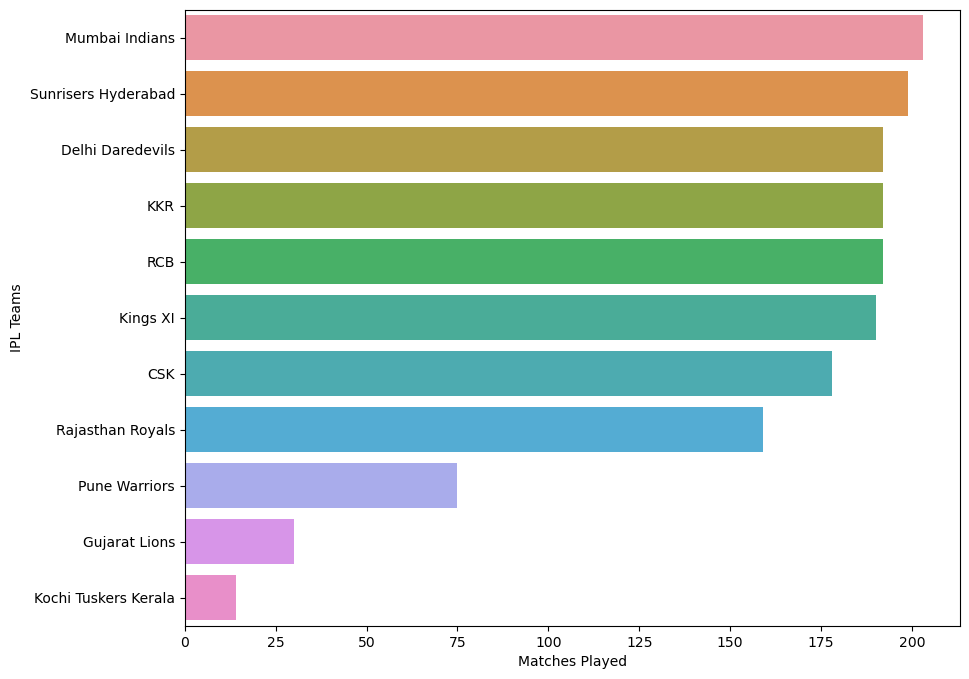

In [59]:
plt.figure(figsize=(10,8))
sns.barplot(y=team_data1.index,x=team_data1,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('IPL Teams')
plt.show()

# 12. Which team has won the most number of times?

In [60]:
wining_team = df_merge.groupby(['winner','id']).count().index.droplevel(level=1).value_counts()
print('Top ten IPL teams')
wining_team

Top ten IPL teams


winner
Mumbai Indians          120
CSK                     106
KKR                      99
Sunrisers Hyderabad      95
RCB                      91
Kings XI                 88
Delhi Daredevils         86
Rajasthan Royals         81
Pune Warriors            27
Gujarat Lions            13
Kochi Tuskers Kerala      6
Name: count, dtype: int64

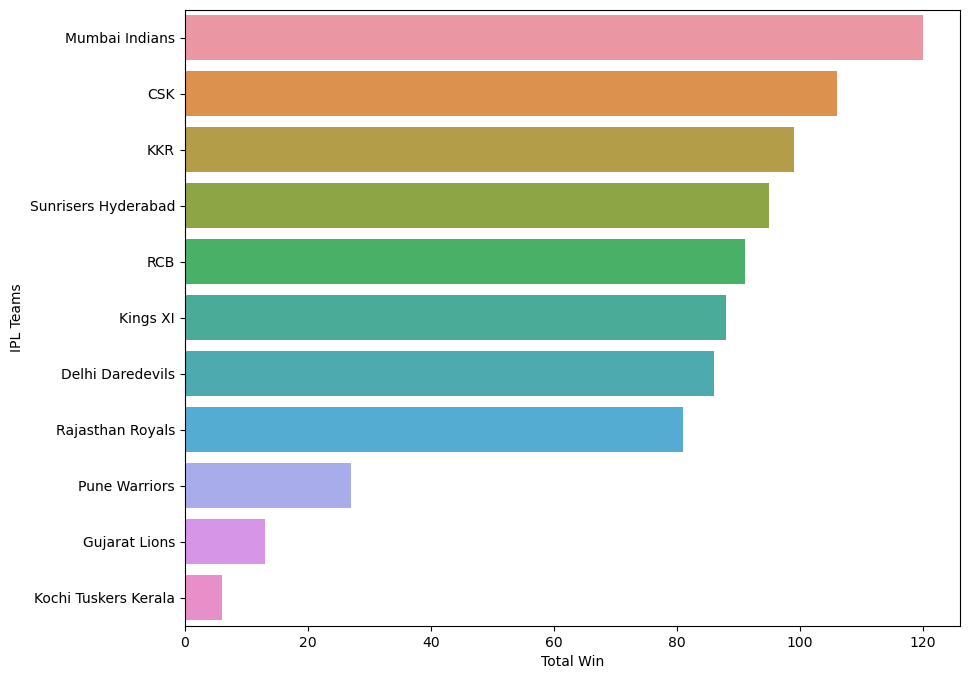

In [61]:
plt.figure(figsize=(10,8))
sns.barplot(y=wining_team.index,x=wining_team,orient='h')
plt.xlabel('Total Win')
plt.ylabel('IPL Teams')
plt.show()

# 13. Which team has the highest winning percentage?

In [62]:
# Assuming 'df_merge' is the DataFrame containing match data
team_wins = df_merge.groupby(['winner', 'id']).count().index.droplevel(level=1).value_counts()
team1_matches = df_merge.groupby(['team1', 'id']).count().index.droplevel(level=1).value_counts()
team2_matches = df_merge.groupby(['team2', 'id']).count().index.droplevel(level=1).value_counts()

# Combine the counts by summing them
total_matches = team1_matches.add(team2_matches, fill_value=0)

# Create a new DataFrame with 'Team' and 'Total Matches' columns
total_matches_df = pd.DataFrame({
    'Team': total_matches.index,
    'Total Matches': total_matches.values
})

# Sort the DataFrame by 'Total Matches' in descending order
total_matches_df = total_matches_df.sort_values(by='Total Matches', ascending=False)

print(total_matches_df)

winning_percentage = (team_wins / total_matches) * 100
winning_percentage = winning_percentage.reset_index()
winning_percentage.columns = ['Team', 'Winning Percentage']

# Sort the DataFrame by 'Winning Percentage' in descending order
winning_percentage = winning_percentage.sort_values(by='Winning Percentage', ascending=False)

winning_percentage


                    Team  Total Matches
6         Mumbai Indians            203
10   Sunrisers Hyderabad            199
1       Delhi Daredevils            192
3                    KKR            192
8                    RCB            192
4               Kings XI            190
0                    CSK            178
9       Rajasthan Royals            159
7          Pune Warriors             75
2          Gujarat Lions             30
5   Kochi Tuskers Kerala             14


,Team,Winning Percentage
0,CSK,59.550562
6,Mumbai Indians,59.113300
3,KKR,51.562500
9,Rajasthan Royals,50.943396
10,Sunrisers Hyderabad,47.738693
8,RCB,47.395833
4,Kings XI,46.315789
1,Delhi Daredevils,44.791667
2,Gujarat Lions,43.333333
5,Kochi Tuskers Kerala,42.857143


In [63]:
team_wins

winner
Mumbai Indians          120
CSK                     106
KKR                      99
Sunrisers Hyderabad      95
RCB                      91
Kings XI                 88
Delhi Daredevils         86
Rajasthan Royals         81
Pune Warriors            27
Gujarat Lions            13
Kochi Tuskers Kerala      6
Name: count, dtype: int64

In [64]:
# Find the team with the highest winning percentage
highest_winning_team = winning_percentage.loc[winning_percentage['Winning Percentage'].idxmax()]

print(f"The team with the highest winning percentage is {highest_winning_team['Team']} with {highest_winning_team['Winning Percentage']:.2f}%.")

The team with the highest winning percentage is CSK with 59.55%.


# 14. Is there any lucky venue for a particular team?

In [65]:
df_merge['winner'].unique()

array(['KKR', 'CSK', 'Delhi Daredevils', 'RCB', 'Rajasthan Royals',
       'Kings XI', 'Sunrisers Hyderabad', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Gujarat Lions'],
      dtype=object)

In [66]:
# Mumbai Indians
df_MI=df_merge[df_merge['winner']=='Mumbai Indians']
df_MI.groupby(['venue','id']).count().index.droplevel(level=1).value_counts()

venue
Wankhede Stadium           42
Eden Gardens               10
MC Stadiun                  9
RG.Int. Stadium             7
Sheikh Zayed Stadium        6
Brabourne Stadium           6
P,Sports Academy            5
MA Chidambaram Stadium      5
F.s.Kotla                   4
PCAB Stadium                4
Dubai.Int.Stadium           3
SRS Stadium                 2
St George's Park            2
Dr.YSRR Stadium             2
Sharjah Cricket Stadium     2
Holkar Cricket Stadium      2
MCA Stadium                 2
S.Mansing Stadium           2
SCA Stadium                 1
Sardar Patel Stadium        1
Buffalo Park                1
Newlands                    1
SuperSport Park             1
Name: count, dtype: int64

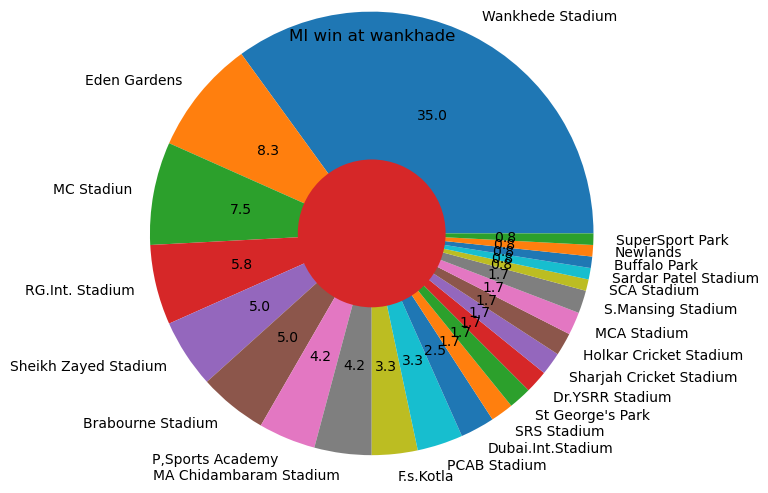

In [67]:
plt.pie(list(df_MI.groupby(['venue','id']).count().index.droplevel(level=1).value_counts()),labels=list(df_MI.groupby(['venue','id']).count().index.droplevel(level=1).value_counts().keys()),autopct="%0.1f",radius=1.5)
plt.pie([1],radius=0.5)
plt.title('MI win at wankhade')
plt.show()

In [68]:
# Chennai Super Kings 
df_CSK=df_merge[df_merge['winner']=='CSK']
df_CSK.groupby(['venue','id']).count().index.droplevel(level=1).value_counts()

venue
MA Chidambaram Stadium     40
Wankhede Stadium            7
F.s.Kotla                   6
Dubai.Int.Stadium           6
MC Stadiun                  5
MCA Stadium                 5
Eden Gardens                5
P,Sports Academy            3
Sheikh Zayed Stadium        3
S.Mansing Stadium           3
RG.Int. Stadium             3
PCAB Stadium                3
JSCA.Int. Stadium           3
Dr.YSRR Stadium             2
St George's Park            2
SuperSport Park             2
Buffalo Park                1
NW Stadium                  1
DBD_Oval                    1
HPCA Stadium                1
Kingsmead                   1
SRS Stadium                 1
Sharjah Cricket Stadium     1
Brabourne Stadium           1
Name: count, dtype: int64

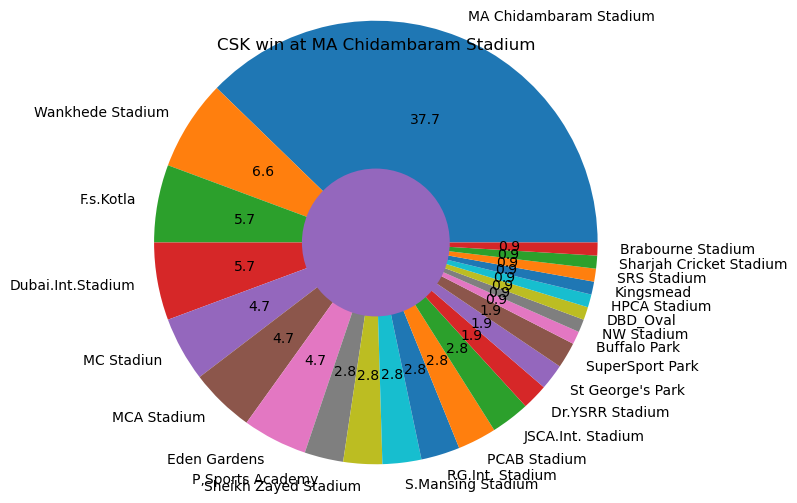

In [69]:
plt.pie(list(df_CSK.groupby(['venue','id']).count().index.droplevel(level=1).value_counts()),labels=list(df_CSK.groupby(['venue','id']).count().index.droplevel(level=1).value_counts().keys()),autopct="%0.1f",radius=1.5)
plt.pie([1],radius=0.5)
plt.title('CSK win at MA Chidambaram Stadium')
plt.show()

In [70]:
# Kolkata Knight Riders  
df_KKR=df_merge[df_merge['winner']=='KKR']
df_KKR.groupby(['venue','id']).count().index.droplevel(level=1).value_counts()

venue
Eden Gardens               45
MC Stadiun                  8
Sheikh Zayed Stadium        6
F.s.Kotla                   5
RG.Int. Stadium             5
PCAB Stadium                4
Barabati Stadium            3
SRS Stadium                 3
S.Mansing Stadium           3
MCA Stadium                 3
P,Sports Academy            2
Dubai.Int.Stadium           2
MA Chidambaram Stadium      2
Kingsmead                   2
SCA Stadium                 1
JSCA.Int. Stadium           1
Sharjah Cricket Stadium     1
Holkar Cricket Stadium      1
SuperSport Park             1
Wankhede Stadium            1
Name: count, dtype: int64

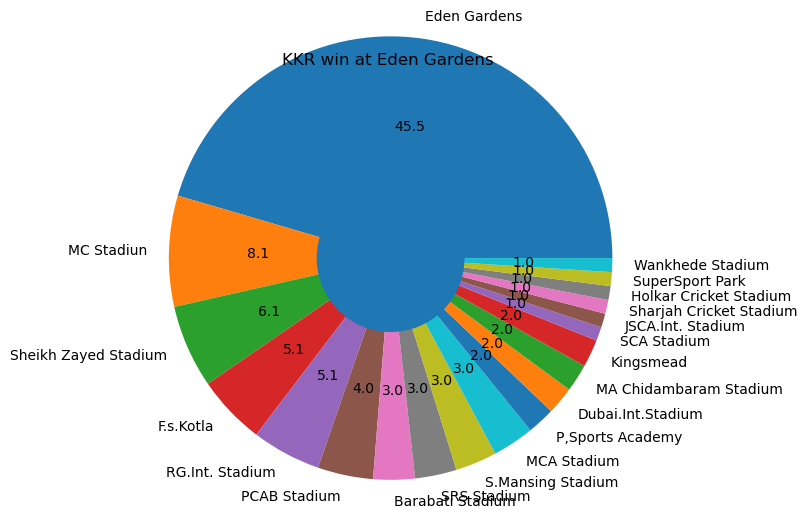

In [71]:
plt.pie(list(df_KKR.groupby(['venue','id']).count().index.droplevel(level=1).value_counts()),labels=list(df_KKR.groupby(['venue','id']).count().index.droplevel(level=1).value_counts().keys()),autopct="%0.1f",radius=1.5)
plt.pie([1],radius=0.5)
plt.title('KKR win at Eden Gardens ')
plt.show()

In [72]:
# Royal Challengers Bangalore
df_RCB=df_merge[df_merge['winner']=='RCB']
df_RCB.groupby(['venue','id']).count().index.droplevel(level=1).value_counts()

venue
MC Stadiun                 37
F.s.Kotla                   6
Dubai.Int.Stadium           5
Eden Gardens                4
PCAB Stadium                4
Wankhede Stadium            3
S.Mansing Stadium           3
Kingsmead                   3
NW Stadium                  3
Sharjah Cricket Stadium     2
RG.Int. Stadium             2
MCA Stadium                 2
SRS Stadium                 2
MA Chidambaram Stadium      2
Sheikh Zayed Stadium        2
SuperSport Park             2
Sardar Patel Stadium        1
SVNS.Int. Stadium           1
Brabourne Stadium           1
SCA Stadium                 1
P,Sports Academy            1
Nehru Stadium               1
JSCA.Int. Stadium           1
Holkar Cricket Stadium      1
Newlands                    1
Name: count, dtype: int64

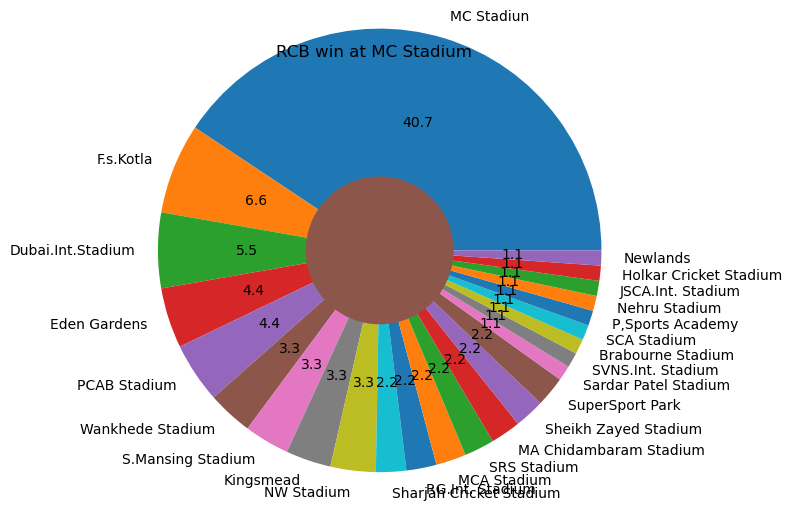

In [73]:
plt.pie(list(df_RCB.groupby(['venue','id']).count().index.droplevel(level=1).value_counts()),labels=list(df_RCB.groupby(['venue','id']).count().index.droplevel(level=1).value_counts().keys()),autopct="%0.1f",radius=1.5)
plt.pie([1],radius=0.5)
plt.title('RCB win at MC Stadium  ')
plt.show()

In [74]:
# Sunrisers Hyderabad 
df_SRH=df_merge[df_merge['winner']=='Sunrisers Hyderabad']
df_SRH.groupby(['venue','id']).count().index.droplevel(level=1).value_counts()

venue
RG.Int. Stadium            33
F.s.Kotla                   8
Dubai.Int.Stadium           6
PCAB Stadium                4
Barabati Stadium            3
Dr.YSRR Stadium             3
MC Stadiun                  3
Newlands                    2
VCA Stadium                 2
SuperSport Park             2
Sheikh Zayed Stadium        2
Sharjah Cricket Stadium     2
SRS Stadium                 2
P,Sports Academy            2
Wankhede Stadium            2
NW Stadium                  2
MA Chidambaram Stadium      2
Kingsmead                   2
HPCA Stadium                2
Eden Gardens                2
Brabourne Stadium           1
S.Mansing Stadium           1
SCA Stadium                 1
JSCA.Int. Stadium           1
SVNS.Int. Stadium           1
Sardar Patel Stadium        1
Green Park                  1
DBD_Oval                    1
Nehru Stadium               1
Name: count, dtype: int64

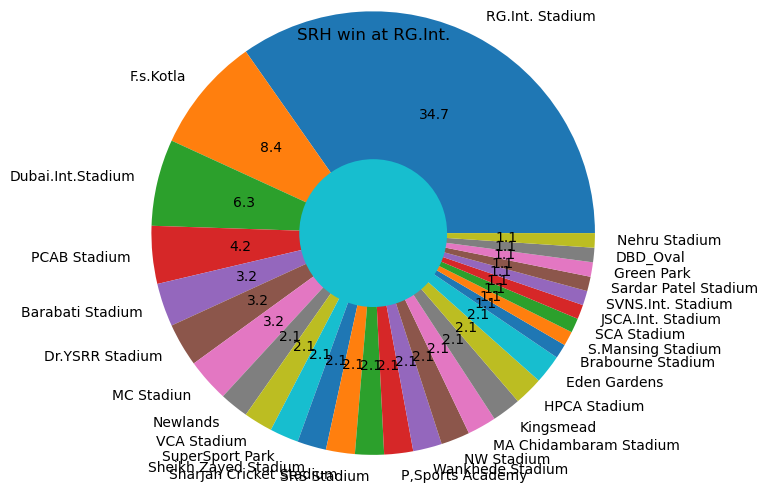

In [75]:
plt.pie(list(df_SRH.groupby(['venue','id']).count().index.droplevel(level=1).value_counts()),labels=list(df_SRH.groupby(['venue','id']).count().index.droplevel(level=1).value_counts().keys()),autopct="%0.1f",radius=1.5)
plt.pie([1],radius=0.5)
plt.title('SRH win at RG.Int.')
plt.show()

In [76]:
# Delhi Daredevils
df_DD=df_merge[df_merge['winner']=='Delhi Daredevils']
df_DD.groupby(['venue','id']).count().index.droplevel(level=1).value_counts()

venue
F.s.Kotla                  31
Dubai.Int.Stadium           5
RG.Int. Stadium             5
MC Stadiun                  4
SVNS.Int. Stadium           4
Sharjah Cricket Stadium     4
Kingsmead                   3
Wankhede Stadium            3
MA Chidambaram Stadium      2
MCA Stadium                 2
Sheikh Zayed Stadium        2
Dr.YSRR Stadium             2
SuperSport Park             2
Eden Gardens                2
S.Mansing Stadium           2
SCA Stadium                 1
St George's Park            1
Sardar Patel Stadium        1
SRS Stadium                 1
Buffalo Park                1
PCAB Stadium                1
P,Sports Academy            1
Newlands                    1
Nehru Stadium               1
NW Stadium                  1
HPCA Stadium                1
Green Park                  1
OUTsurance Oval             1
Name: count, dtype: int64

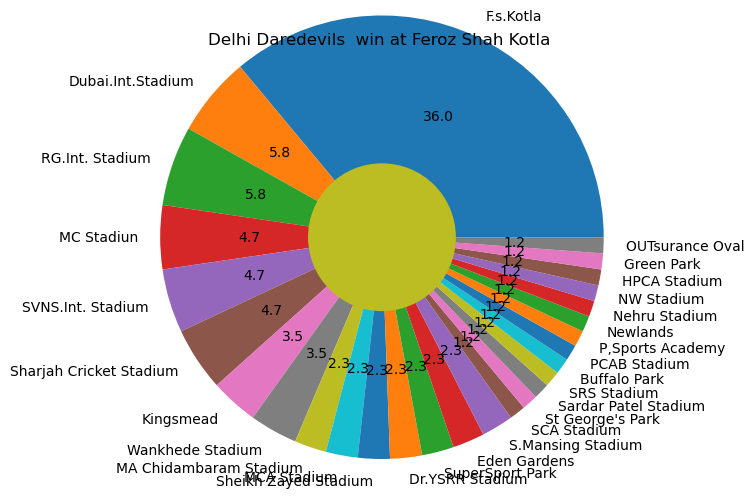

In [77]:
plt.pie(list(df_DD.groupby(['venue','id']).count().index.droplevel(level=1).value_counts()),labels=list(df_DD.groupby(['venue','id']).count().index.droplevel(level=1).value_counts().keys()),autopct="%0.1f",radius=1.5)
plt.pie([1],radius=0.5)
plt.title('Delhi Daredevils  win at Feroz Shah Kotla ')
plt.show()

In [78]:
# Rajasthan Royals 
df_RR=df_merge[df_merge['winner']=='Rajasthan Royals']
df_RR.groupby(['venue','id']).count().index.droplevel(level=1).value_counts()

venue
S.Mansing Stadium          32
Sardar Patel Stadium        7
Sheikh Zayed Stadium        6
Wankhede Stadium            4
MC Stadiun                  4
F.s.Kotla                   4
PCAB Stadium                3
RG.Int. Stadium             2
Kingsmead                   2
Eden Gardens                2
Sharjah Cricket Stadium     2
SuperSport Park             2
Brabourne Stadium           2
MA Chidambaram Stadium      1
MCA Stadium                 1
Newlands                    1
P,Sports Academy            1
Dr.YSRR Stadium             1
SRS Stadium                 1
Dubai.Int.Stadium           1
St George's Park            1
VCA Stadium                 1
Name: count, dtype: int64

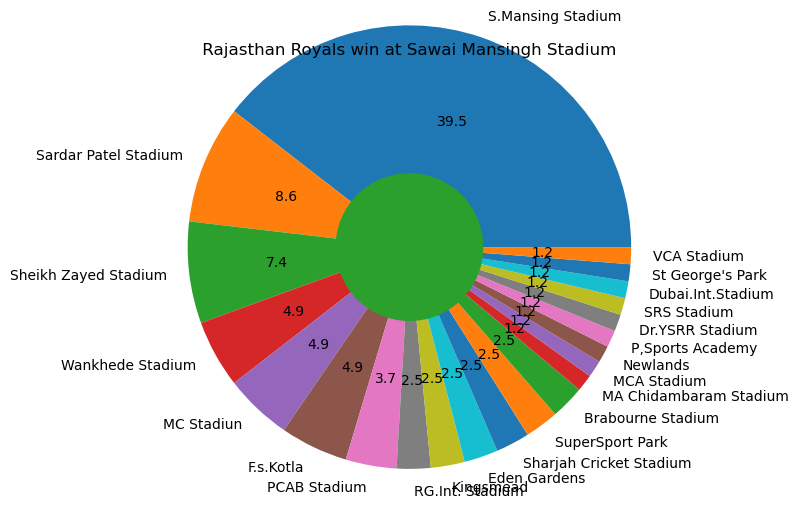

In [79]:
plt.pie(list(df_RR.groupby(['venue','id']).count().index.droplevel(level=1).value_counts()),labels=list(df_RR.groupby(['venue','id']).count().index.droplevel(level=1).value_counts().keys()),autopct="%0.1f",radius=1.5)
plt.pie([1],radius=0.5)
plt.title(' Rajasthan Royals win at Sawai Mansingh Stadium ')
plt.show()

# 21. Who are the leading run-scorers of all time

In [80]:
print('Top twenty Batsman')
df_batter = df_merge.groupby(['batsman'])['batsman_runs'].sum().sort_values(ascending=False).head(20)
df_batter

Top twenty Batsman


batsman
V Kohli           5851
SK Raina          5368
DA Warner         5235
RG Sharma         5230
S Dhawan          5197
AB de Villiers    4782
CH Gayle          4761
MS Dhoni          4632
RV Uthappa        4607
G Gambhir         4217
AM Rahane         3933
SR Watson         3874
KD Karthik        3796
AT Rayudu         3659
MK Pandey         3268
YK Pathan         3204
KA Pollard        3023
BB McCullum       2880
PA Patel          2840
Yuvraj Singh      2739
Name: batsman_runs, dtype: int64

Top twenty Batsman


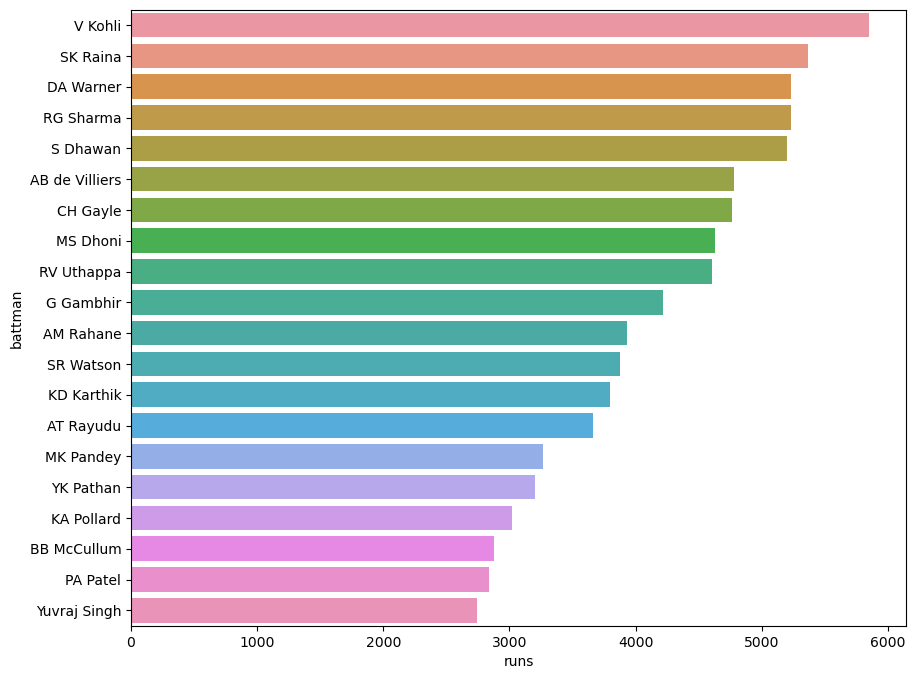

In [81]:
print('Top twenty Batsman')
plt.figure(figsize=(10,8))
sns.barplot(y=df_batter.index,x=df_batter,orient='h')
plt.xlabel('runs')
plt.ylabel('battman')
plt.show()

# 22. Who has hit the most number of 4's?
# 23. Who has hit the most number of 6's?
# 24. Who has the highest strike rate?

In [82]:
top_batsman = df_merge.groupby(['batsman']).agg(batsman_total=('batsman_runs', 'sum')).reset_index()\
                .sort_values(by='batsman_total', ascending=False).head(10)
top_batsman

,batsman,batsman_total
505,V Kohli,5851
438,SK Raina,5368
116,DA Warner,5235
379,RG Sharma,5230
407,S Dhawan,5197
24,AB de Villiers,4782
96,CH Gayle,4761
301,MS Dhoni,4632
398,RV Uthappa,4607
154,G Gambhir,4217


In [83]:
top_batsman_score = pd.DataFrame(columns=['batsman', 'fours', 'sixers', 'fifties', 'hundreds', 'highest_score', 'total_runs', 'balls_faced', 'strike_rate', 'matches_played'])

for _, row in top_batsman.iterrows():
    batsman_data = df_merge[df_merge['batsman'] == row['batsman']][['id', 'batsman', 'batsman_runs', 'ball']]

    fours = (batsman_data['batsman_runs'] == 4).sum()
    sixers = (batsman_data['batsman_runs'] == 6).sum()

    innings_stats = batsman_data.groupby('id').agg(
        runs=('batsman_runs', 'sum'),
        balls_faced=('ball', 'count'),
    ).reset_index()

    fifties = len(innings_stats[innings_stats['runs'] >= 50])
    hundreds = len(innings_stats[innings_stats['runs'] >= 100])

    matches_played = innings_stats['id'].nunique()
    highest_score = innings_stats['runs'].max()
    total_runs = row['batsman_total']
    total_balls_faced = innings_stats['balls_faced'].sum()

    # Calculate the strike rate (runs made with respect to balls)
    strike_rate = (total_runs / total_balls_faced) * 100 if total_balls_faced > 0 else 0

    player_stats = {
        'batsman': row['batsman'],
        'fours': fours,
        'sixers': sixers,
        'fifties': fifties,
        'hundreds': hundreds,
        'highest_score': highest_score,
        'total_runs': total_runs,
        'balls_faced': total_balls_faced,
        'strike_rate': strike_rate,
        'matches_played': matches_played
    }

    top_batsman_score = pd.concat([top_batsman_score, pd.DataFrame([player_stats])], ignore_index=True)

top_batsman_score

/tmp/ipykernel_5779/638102710.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_batsman_score = pd.concat([top_batsman_score, pd.DataFrame([player_stats])], ignore_index=True)


,batsman,fours,sixers,fifties,hundreds,highest_score,total_runs,balls_faced,strike_rate,matches_played
0,V Kohli,503,199,44,5,113,5851,4596,127.306353,181
1,SK Raina,493,194,39,1,100,5368,4041,132.838406,189
2,DA Warner,509,193,52,4,126,5235,3809,137.437648,141
3,RG Sharma,458,214,40,1,109,5230,4088,127.935421,194
4,S Dhawan,591,109,43,2,106,5197,4208,123.502852,175
5,AB de Villiers,379,234,40,3,133,4782,3213,148.832866,154
6,CH Gayle,383,348,37,6,175,4761,3333,142.844284,129
7,MS Dhoni,313,216,23,0,84,4632,3493,132.608073,182
8,RV Uthappa,454,163,24,0,87,4607,3658,125.943138,182
9,G Gambhir,492,59,36,0,93,4217,3524,119.665153,151


# 25. Who is the leading wicket-taker?

In [84]:
top_bowler = df_merge.groupby(['bowler']).agg(Total_Wicket=('is_wicket', 'sum')).reset_index()\
                .sort_values(by='Total_Wicket', ascending=False).head(10)
top_bowler

,bowler,Total_Wicket
350,SL Malinga,188
99,DJ Bravo,175
6,A Mishra,169
276,PP Chawla,164
133,Harbhajan Singh,161
281,R Ashwin,153
57,B Kumar,146
358,SP Narine,143
395,UT Yadav,137
292,R Vinay Kumar,127


In [85]:
print('Top twenty Bowler')
plt.figure(figsize=(10,8))
sns.barplot(y=df_bowler.index,x=df_bowler,orient='h')
plt.xlabel('runs')
plt.ylabel('battman')
plt.show()

Top twenty Bowler


NameError: name 'df_bowler' is not defined

<Figure size 1000x800 with 0 Axes>

In [ ]:
top_bowler_score = pd.DataFrame(columns=['bowler', 'total_wicket', 'highest_wicket', 'matches_played'])

for idx, row in top_bowler.iterrows():
    bowler_data = df_merge[df_merge['bowler'] == row['bowler']][['id', 'bowler', 'is_wicket']]

    total_wicket = bowler_data.groupby('id').agg(score=('is_wicket', 'sum')).reset_index()
    matches_played = len(total_wicket)
    highest_wicket = total_wicket['score'].max()

    # Use pd.concat to concatenate DataFrames
    top_bowler_score = pd.concat([top_bowler_score, pd.DataFrame({
        'bowler': [row['bowler']],
        'total_wicket': [row['Total_Wicket']],
        'highest_wicket': [highest_wicket],
        'matches_played': [matches_played]
    })], ignore_index=True)

top_bowler_score


# 26. Which stadium has hosted the most number of matches?

In [ ]:
venue_data =  df_merge.groupby(['venue','id']).count().index.droplevel(level=1).value_counts()
venue_data

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y=venue_data.index,x=venue_data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Venue')
plt.show()

# 27. Who has won the most MOM awards?

In [ ]:
#Top ten man of the match?
ManOfDMatch= df_merge.groupby(['player_of_match','id']).count().index.droplevel(level=1).value_counts()
ManOfDMatch.head(10)

# 28. What is the count of fours hit in each season?
# 29. What is the count of sixes hit in each season?
# 30. What is the count of runs scored from boundaries in each season?
# 31. What is the run contribution from boundaries in each season?

In [86]:
# Filter relevant columns
boundary_data = df_merge[['Season', 'id', 'batsman_runs', 'non_boundary']]

# Create a column 'is_boundary' to identify boundary runs
boundary_data['is_boundary'] = boundary_data['non_boundary'] == 0

# Group by Season and calculate counts and sums
boundary_stats = boundary_data.groupby('Season').agg(
    Fours=pd.NamedAgg(column='batsman_runs', aggfunc=lambda x: (x == 4).sum()),
    Sixes=pd.NamedAgg(column='batsman_runs', aggfunc=lambda x: (x == 6).sum()),
    BoundaryRuns=pd.NamedAgg(column='batsman_runs', aggfunc='sum'),
    RunContributionFromBoundaries=pd.NamedAgg(column='batsman_runs', aggfunc=lambda x: x[boundary_data['is_boundary']].sum())
).reset_index()

print(boundary_stats)


    Season  Fours  Sixes  BoundaryRuns  RunContributionFromBoundaries
0     2008   1703    623         16809                          16803
1     2009   1317    506         15344                          15340
2     2010   1708    585         17735                          17735
3     2011   1913    637         19877                          19865
4     2012   1911    733         21323                          21311
5     2013   2052    675         21427                          21417
6     2014   1562    714         17922                          17922
7     2015   1568    678         17042                          17042
8     2016   1633    639         17962                          17952
9     2017   1611    705         17907                          17899
10    2018   1652    872         19098                          19094
11    2019   1644    777         18475                          18475
12    2020   1583    735         18508                          18498


/tmp/ipykernel_5779/3485748843.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boundary_data['is_boundary'] = boundary_data['non_boundary'] == 0
